In [2]:
%matplotlib inline
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#generate weight matrix
def genWeight(shape): 
    initial=tf.truncated_normal(shape,stddev=0.1) # 標準差=0.1
    return tf.Variable(initial)

In [4]:
#generate bias
def genBias(shape): 
    initial=tf.constant(0.1,shape=shape) 
    return tf.Variable(initial)

In [5]:
#define convolution layer
# zero padding at rightmost
# stride = (1,x movement,y movement,1)
# x = input image
def conv2d(x,W):
    return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='SAME')

In [6]:
#define max pooling layer
# 2x2 pooling
def max_pool_2x2(x): 
    return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1], padding='SAME')

In [7]:
def main(opt):
    result = []
    epoch = 10
    print "start training..."
#define placeholder
    _x = tf.placeholder(tf.float32,[None,784])
    _y = tf.placeholder(tf.float32,[None,10])
#dropout probability
    keep_prob = tf.placeholder(tf.float32)
#reshape _x, define channel = 1
    _image=tf.reshape(_x,[-1,28,28,1])
    
#constructing CNN
    ###---------layer 1---------###
    # input -> image with channel 1
    # output feature map: 32
    # after pooling we get 14x14x32 output
    W_conv1=genWeight([5,5,1,32])
    b_conv1=genBias([32])
    #use relu as activation function
    conv_layer1 = tf.nn.relu(conv2d(_image,W_conv1)+b_conv1)
    pool_layer1 = max_pool_2x2(conv_layer1)
    
    ###--------layer 2---------###
    # input -> 32 feature maps
    # output feature map: 64
    # output-> after pooling we get 7x7x64 output
    W_conv2 = genWeight([5,5,32,64])
    b_conv2 = genBias([64])
    conv_layer2 = tf.nn.relu(conv2d(pool_layer1,W_conv2)+b_conv2)
    pool_layer2 = max_pool_2x2(conv_layer2)
    
    ###------fully connected layer 1------###
    # size: 1024x1
    _flattern = tf.reshape(pool_layer2,[-1,7*7*64]) 
    W_fc1=genWeight([7*7*64,128]) 
    b_fc1=genBias([128])
    h_fc1=tf.nn.relu(tf.matmul(_flattern,W_fc1)+b_fc1)    
    #-----dropout----:
    h_fc1_drop = tf.nn.dropout(h_fc1,keep_prob)
    
    ###----fully connected layer 2----###
    # size 10 x 1
    # use softmax to classify
    W_fc2=genWeight([128,10]) 
    b_fc2=genBias([10])    
    y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

    
    
    
    #---define cost function
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=_y, logits=y_conv))
    
    #---setlearning rate
    if opt == 1:
        train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
    if opt == 2:
        train_step = tf.train.RMSPropOptimizer(1e-4).minimize(cross_entropy)
    if opt == 3:
        train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

    correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(_y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    #define session
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for j in range(epoch):
            print "      ##### epoch ",j+1," #####"
            for i in range(1100):
                batch = mnist.train.next_batch(50)
                train_accuracy = accuracy.eval(feed_dict={_x: batch[0], _y: batch[1], keep_prob: 1.0})
                if i % 100 == 0:
                    print('step %d, training accuracy %g' % (i, train_accuracy))
                train_step.run(feed_dict={_x: batch[0], _y: batch[1], keep_prob: 0.5})          
            temp = accuracy.eval(feed_dict={_x: mnist.test.images, _y: mnist.test.labels, keep_prob: 1.0})
            result.append(temp)
            print('test accuracy %g' % temp)
            
    return result


In [8]:
#read data using tensorflow
mnist = input_data.read_data_sets('data/fashion', one_hot=True)

Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


In [9]:
#if the program is running
if __name__ == '__main__':
    print '\n#----adative momentum---'
    result1 = main(1)
    print '\n#----gradient descent---'
    result2 = main(3)
    print '\n#----rms propagation---'
    result3 = main(2)
    


#----adative momentum---
start training...
      ##### epoch  1  #####
step 0, training accuracy 0.16
step 100, training accuracy 0.66
step 200, training accuracy 0.86
step 300, training accuracy 0.74
step 400, training accuracy 0.76
step 500, training accuracy 0.8
step 600, training accuracy 0.84
step 700, training accuracy 0.8
step 800, training accuracy 0.76
step 900, training accuracy 0.8
step 1000, training accuracy 0.82
test accuracy 0.8195
      ##### epoch  2  #####
step 0, training accuracy 0.86
step 100, training accuracy 0.78
step 200, training accuracy 0.82
step 300, training accuracy 0.9
step 400, training accuracy 0.82
step 500, training accuracy 0.9
step 600, training accuracy 0.82
step 700, training accuracy 0.9
step 800, training accuracy 0.82
step 900, training accuracy 0.92
step 1000, training accuracy 0.88
test accuracy 0.8424
      ##### epoch  3  #####
step 0, training accuracy 0.86
step 100, training accuracy 0.76
step 200, training accuracy 0.88
step 300, train

KeyboardInterrupt: 

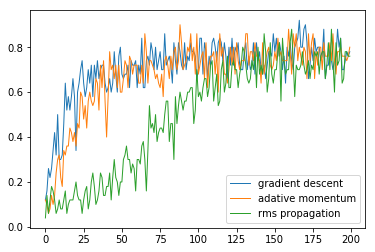

In [94]:
#plot the results
iter_log = np.arange(len(result1)).tolist()
plt.plot(iter_log, result2, label="gradient descent", linewidth=1)
plt.plot(iter_log, result1, label="adative momentum", linewidth=1)
plt.plot(iter_log, result3, label="rms propagation", linewidth=1)
plt.legend()
